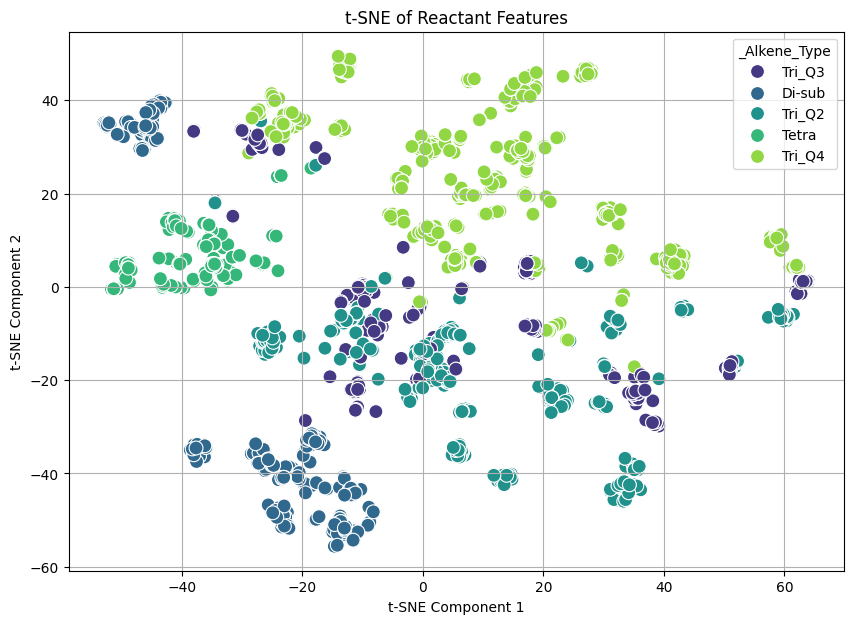

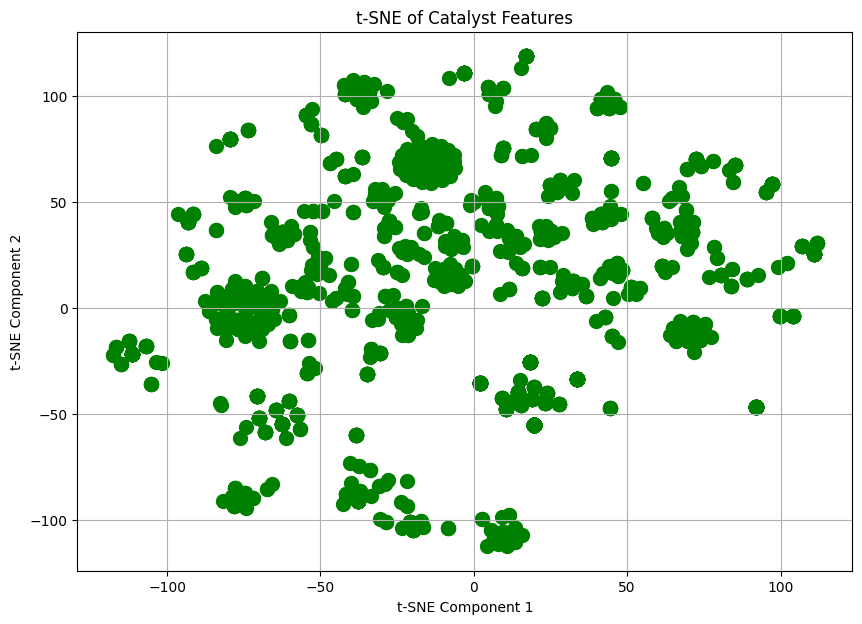

In [14]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Rxn ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop irrelevant features and non-numeric columns
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df_imputed)

# Transform the data using the fitted scaler
df_scaled = pd.DataFrame(scaler.transform(df_imputed), columns=df_imputed.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Select reactant and catalyst features
reactant_features = df_selected[[col for col in df_selected.columns if 'Q' in col or 'C' in col]]
catalyst_features = df_selected[['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4']]

# Apply t-SNE to Reactant Features
tsne_reactants = TSNE(n_components=2, random_state=42)
tsne_reactant_results = tsne_reactants.fit_transform(reactant_features)

# Apply t-SNE to Catalyst Features
tsne_catalysts = TSNE(n_components=2, random_state=42)
tsne_catalyst_results = tsne_catalysts.fit_transform(catalyst_features)
tsne_catalyst_df = pd.DataFrame(tsne_catalyst_results, columns=['TSNE1', 'TSNE2'])

# Visualization of t-SNE for Reactant Features, colored by _Alkene_Type
tsne_reactant_df = pd.DataFrame(tsne_reactant_results, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=alkene_types, palette='viridis', data=tsne_reactant_df, s=100)

plt.title('t-SNE of Reactant Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='_Alkene_Type')
plt.grid(True)
plt.show()

# Visualization of t-SNE for Catalyst Features, single color
plt.figure(figsize=(10, 7))
plt.scatter(tsne_catalyst_df['TSNE1'], tsne_catalyst_df['TSNE2'], color='green', s=100)

plt.title('t-SNE of Catalyst Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


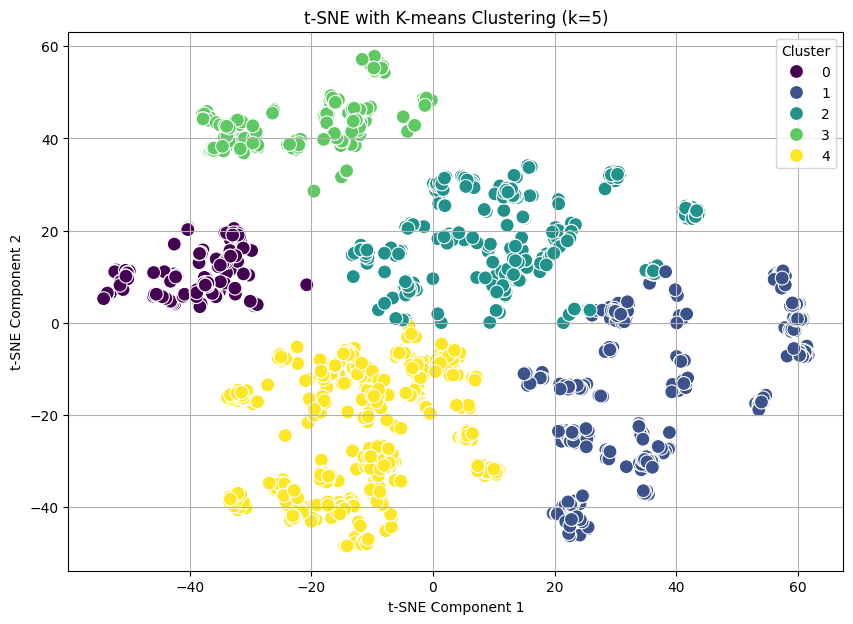

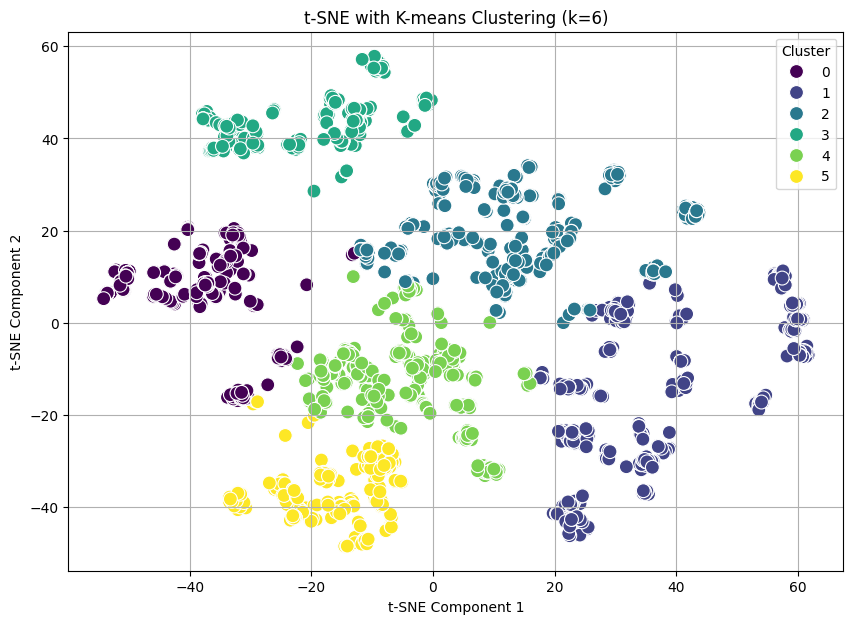

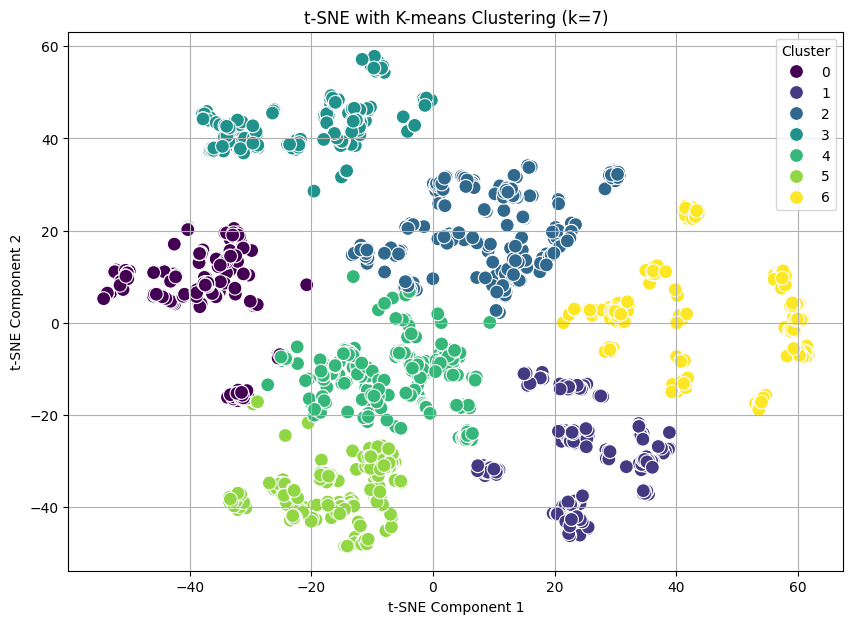

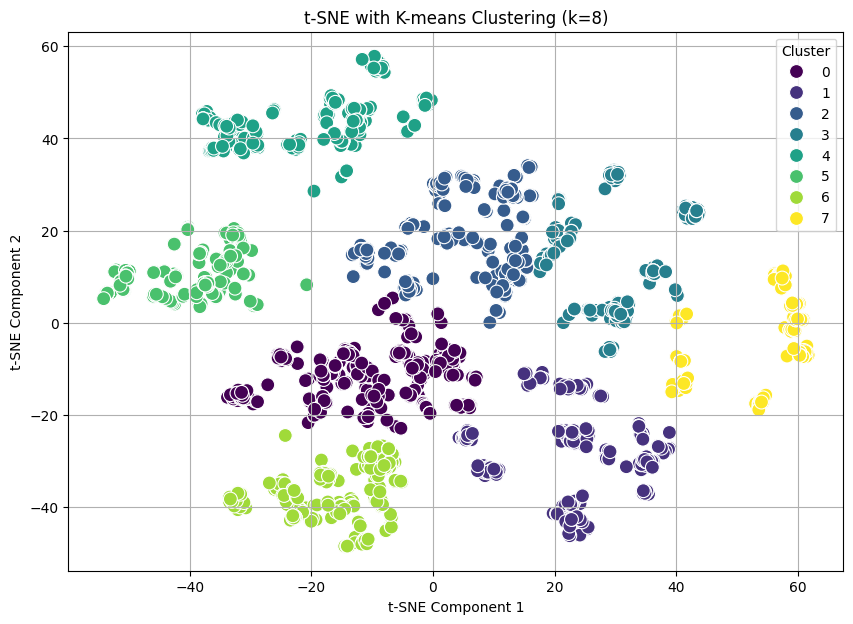

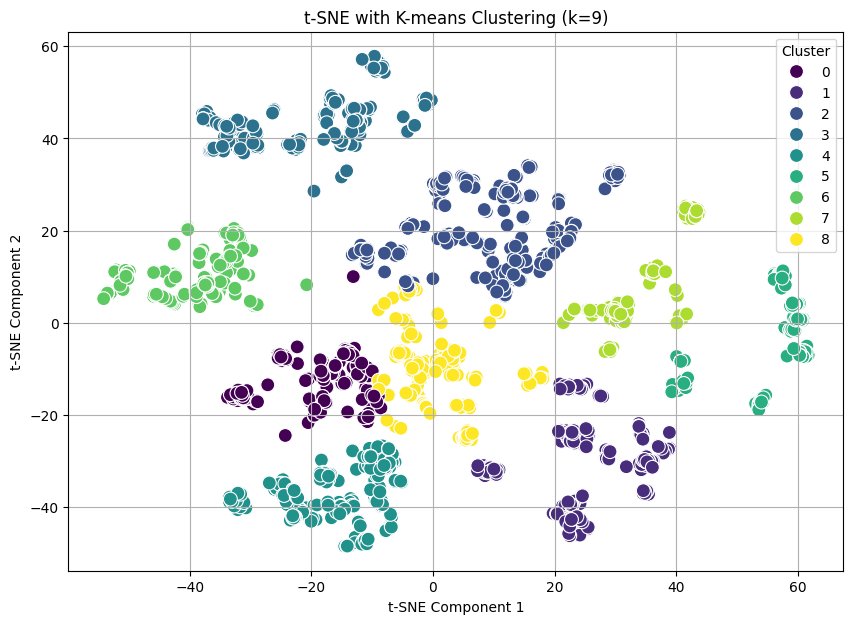

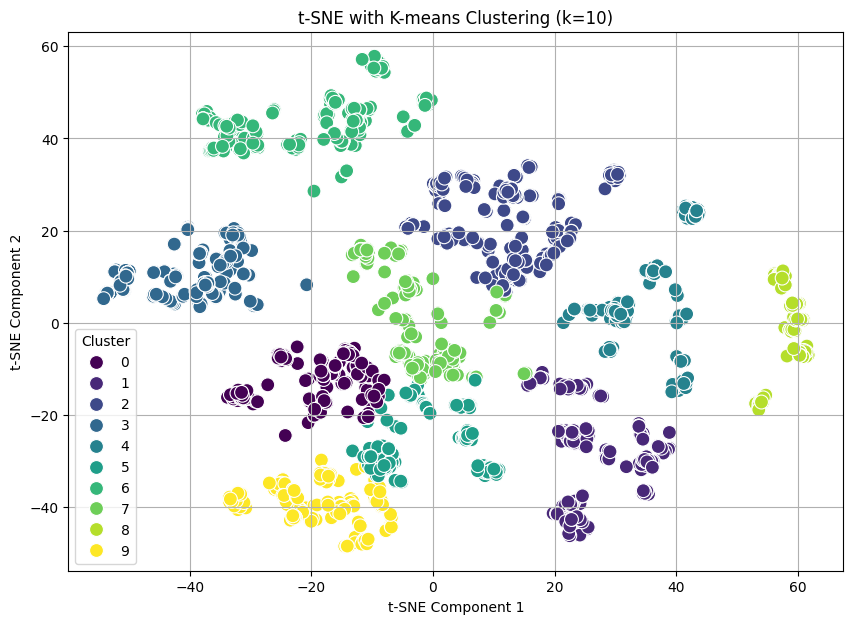

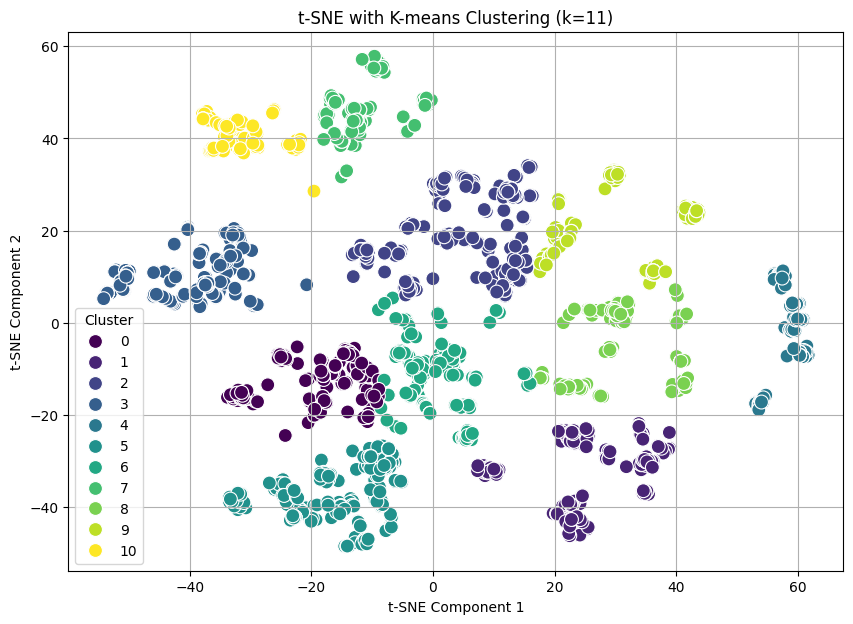

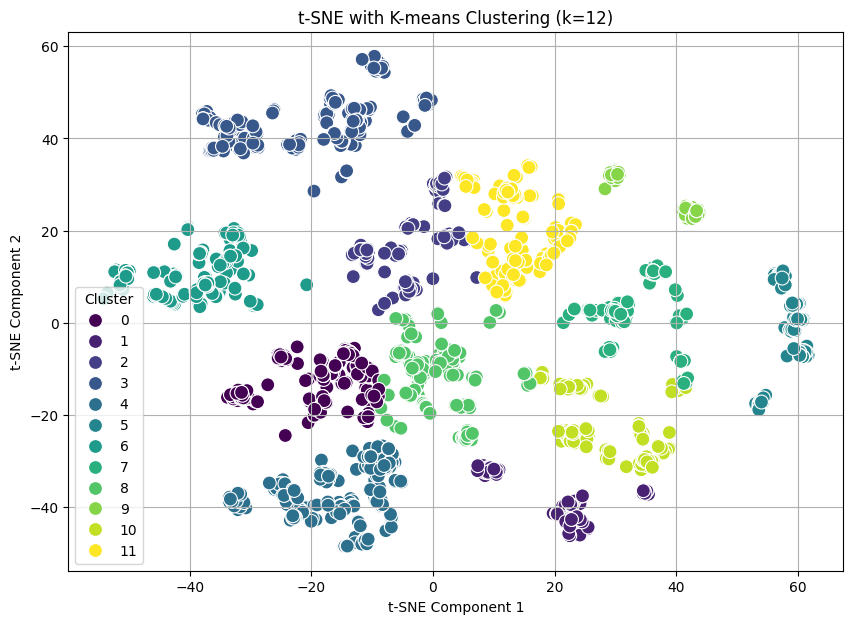

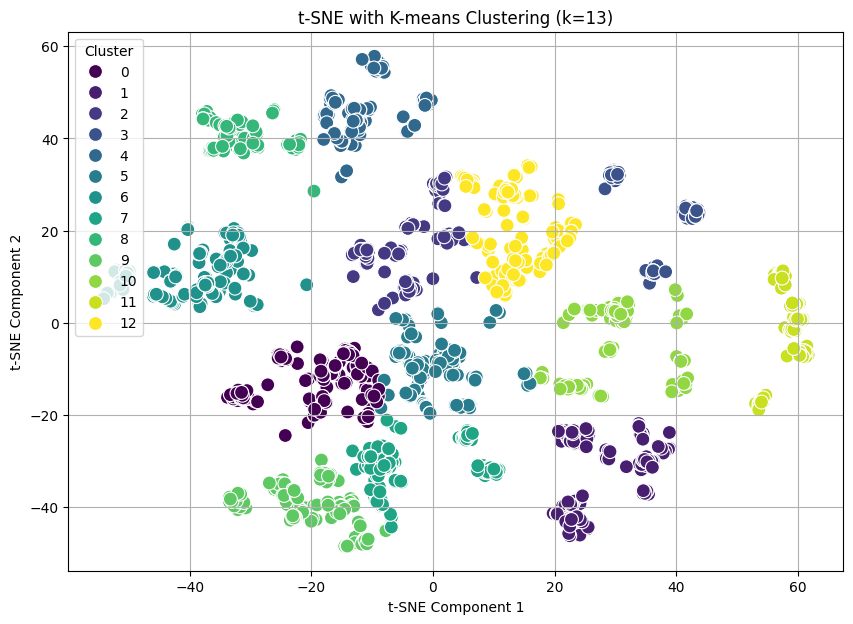

In [18]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/reordered_final_merged_cleaned_qqm_molecule_charges.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' and '_Alkene_Type' for labeling
labels = df['Rxn ID']
alkene_types = df['_Alkene_Type']

# Drop the irrelevant features
df = df.drop(columns=['Rxn ID', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_selected)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

# Loop through a range of cluster numbers for K-means clustering and visualization
for n_clusters in range(5, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tsne_df)

    # Add cluster labels to the t-SNE DataFrame
    tsne_df['Cluster'] = cluster_labels

    # Visualization of t-SNE with K-means clustering
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_df, s=100, legend='full')

    plt.title(f't-SNE with K-means Clustering (k={n_clusters})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


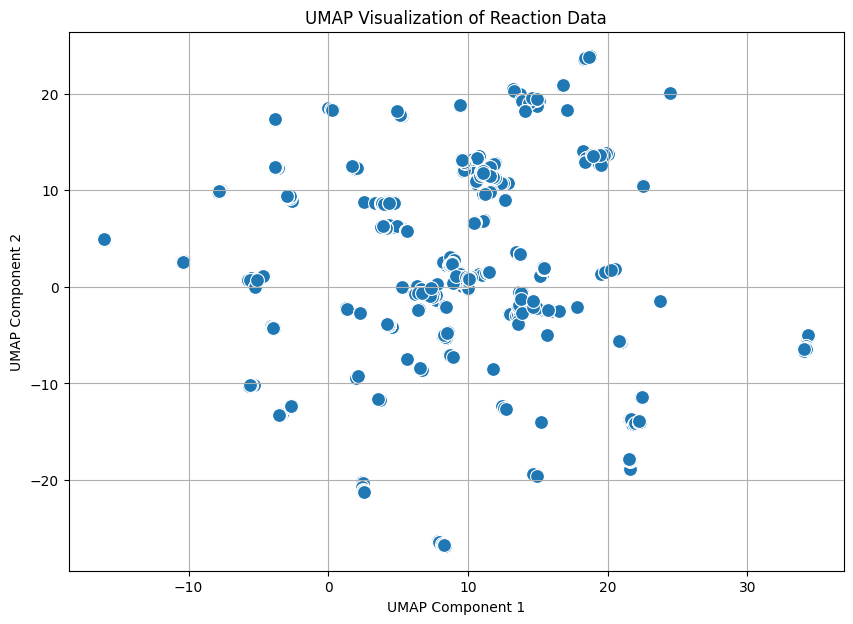

In [22]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns


umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
umap_results = umap_reducer.fit_transform(df_selected)

# Load the dataset
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/formatted_reaction_data_with_ids.xlsx'
df = pd.read_excel(file_path)

# Preserve the 'Reaction ID' and '_Alkene_Type' for labeling (if needed later)
labels = df['Reaction ID']
alkene_types = df['_Alkene_Type']

# Drop irrelevant features
df = df.drop(columns=['Reaction ID', 'Pressure', 'Temperature', 'S/C', 'ddG', '_Alkene_Type'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Drop rows with any missing values
df_numeric = df_numeric.dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0)
df_selected = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_results = umap_reducer.fit_transform(df_selected)

# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])

# Visualization of UMAP results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, s=100)

plt.title('UMAP Visualization of Reaction Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()

# umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
# umap_results = umap_reducer.fit_transform(df_selected)

